In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import pandas as pd
import glob
import pickle
import numpy as np
from csslconstants import *
from cmcrameri import cm

homedir = '/users/cowherd/Documents/cssltimeseries/'
datadir = homedir + 'data/'
os.chdir(homedir)

datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']


ImportError: dlopen(/opt/anaconda3/envs/snow/lib/python3.9/site-packages/rasterio/_base.cpython-39-darwin.so, 0x0002): Symbol not found: _ZSTD_compressBound
  Referenced from: /opt/anaconda3/envs/snow/lib/libgdal.30.dylib
  Expected in: /opt/anaconda3/envs/snow/lib/libblosc.1.21.1.dylib

In [3]:
import rioxarray as rxr
import rasterio as rio


TypeError: <class 'numpy.typing._dtype_like._SupportsDType'> is not a generic class

In [41]:
## load data from the prep_cssl_data.py process
with open(datadir + 'cssldata.pickle', 'rb') as handle:
    cssl = pickle.load(handle)
    
datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']

In [174]:
## ## convert to a  nice csv file 
alldata = pd.DataFrame(columns=datakeys)
for i in datakeys[1:]:
    tmpdata = []
    alldates = []
    for k in sorted(cssl.keys()):
        data = cssl[k]
        try:
            y = data[i].values.astype(float)
        except:
            y = data[i].values
        for v in y: tmpdata.append(v)
        t = data['dt']
        for v in t: alldates.append(v)

    alldata[i] = tmpdata


alldata['Date'] = alldates
alldata.index = alldata.Date
alldata_even = alldata.resample('D').mean()

alldata_even[alldata_even['Air Temp Min (C)']>40] = np.nan
alldata_even.to_csv(datadir + 'cssldata.csv')
alldata_monthly = alldata_even.resample('M').mean()
alldata_monthly.to_csv(datadir + 'csslmonthly.csv')

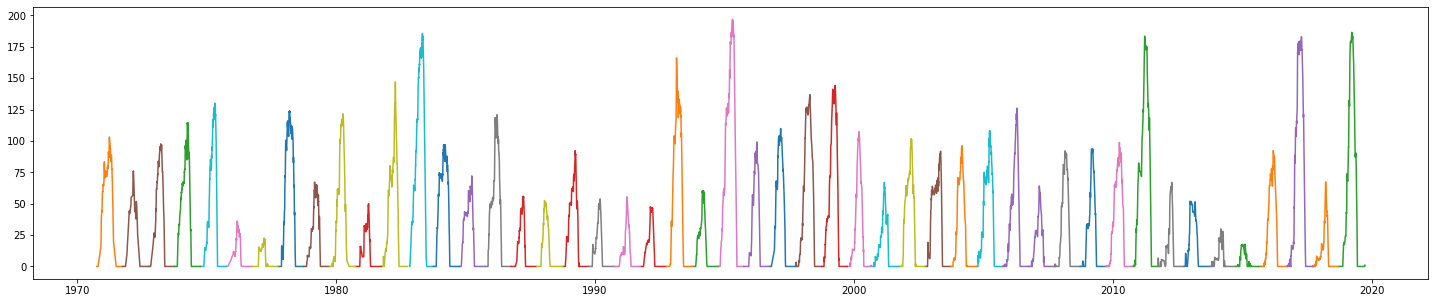

In [373]:
fig,ax = plt.subplots(figsize=(25,5))
for k in cssl.keys():
    data = cssl[k]
    y = pd.Series(data['Snow Water Equivalent (cm)'])
    y.index = index=data['dt']
    y2 = y.interpolate()
    ax.plot(y2)


/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipykernel_135282/1673059199.py:26: RuntimeWarning: All-NaN axis encountered
  ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
/tmp/ipyke

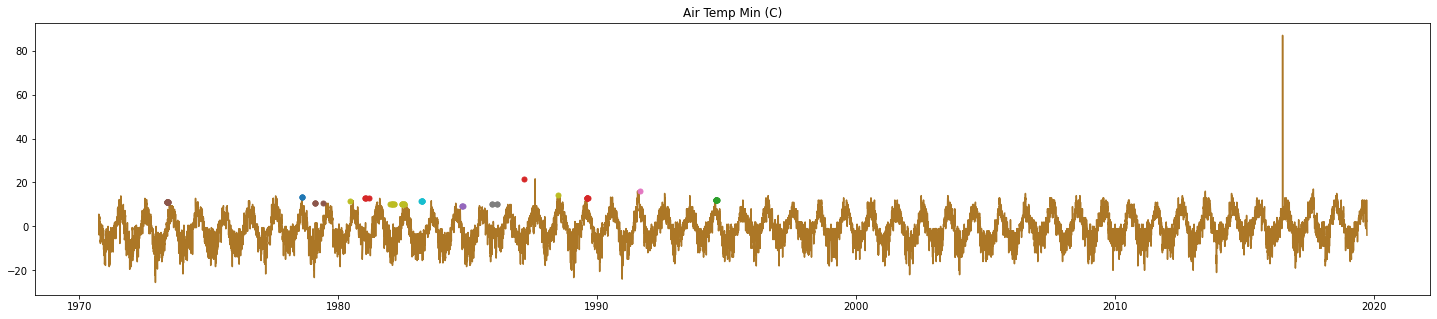

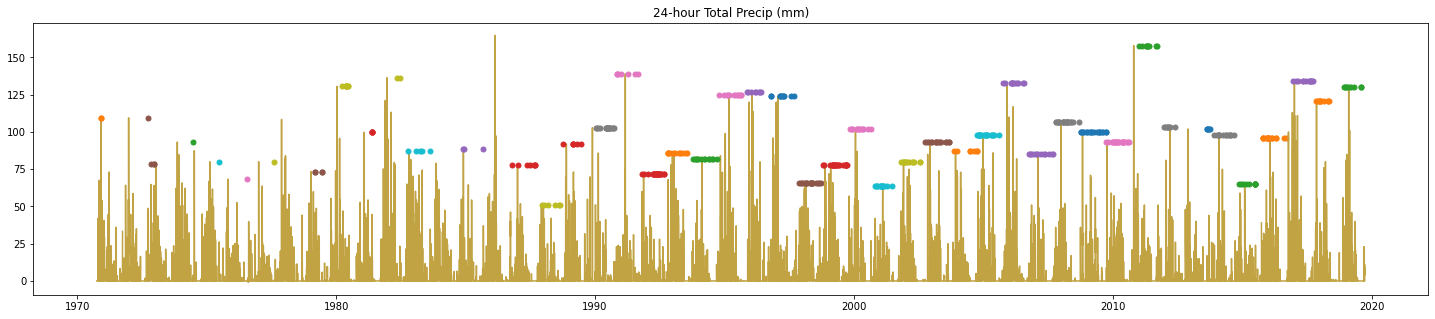

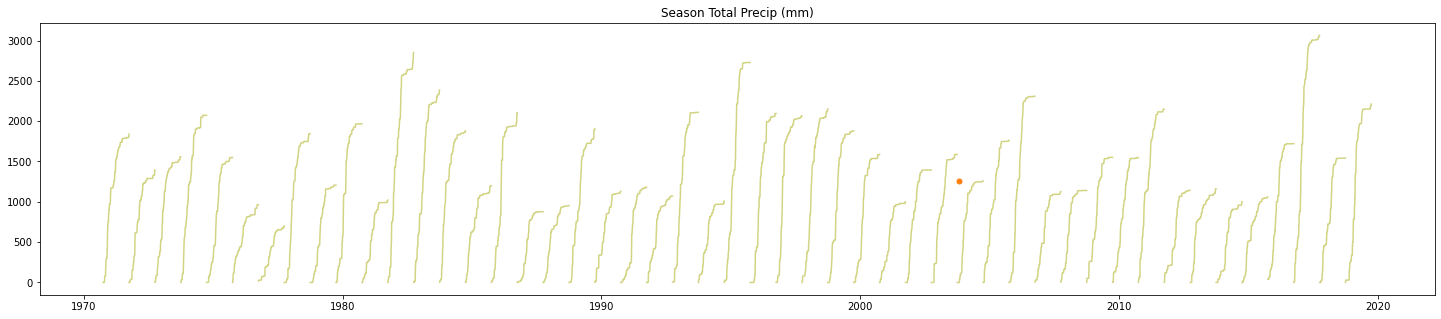

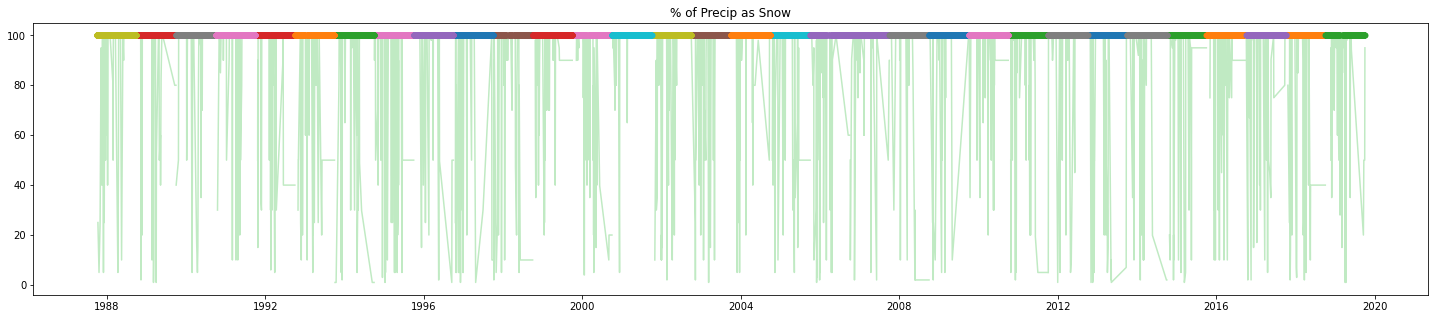

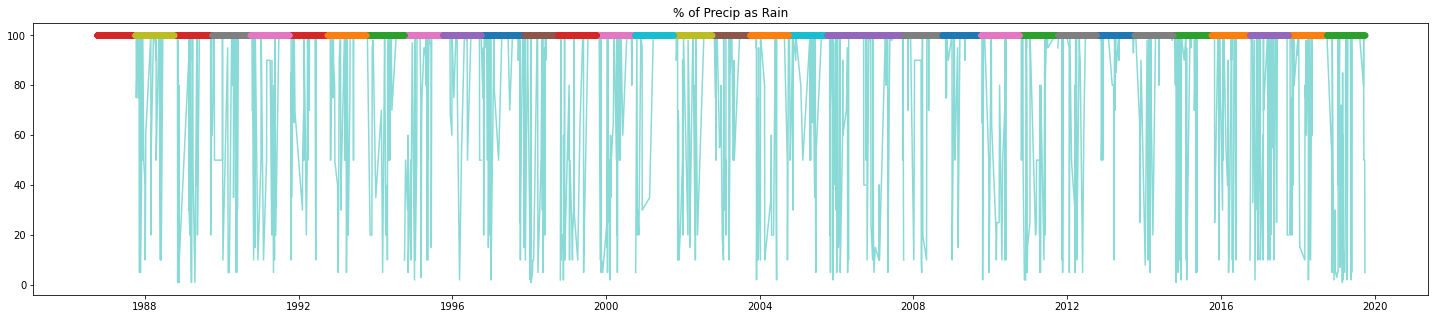

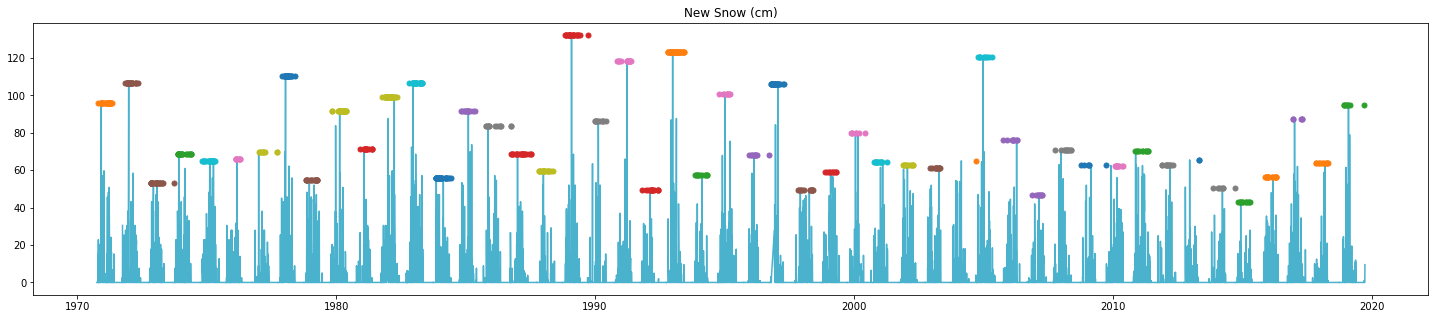

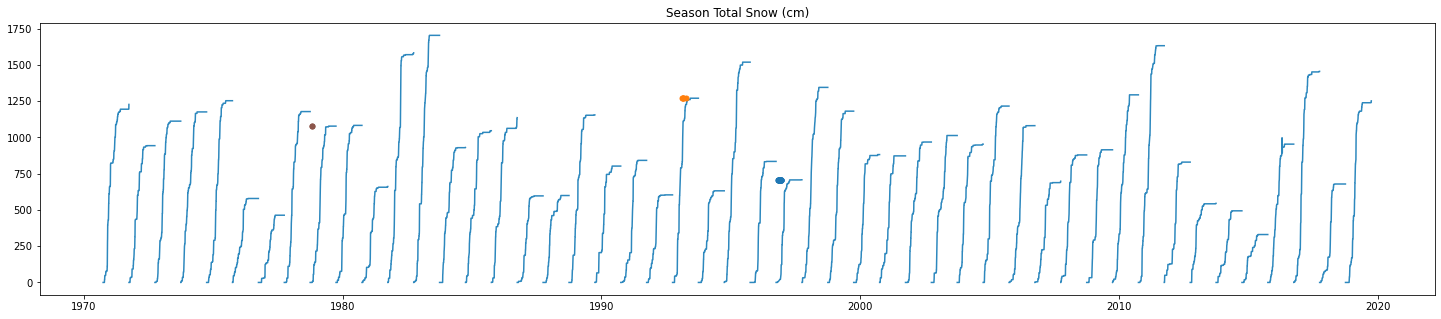

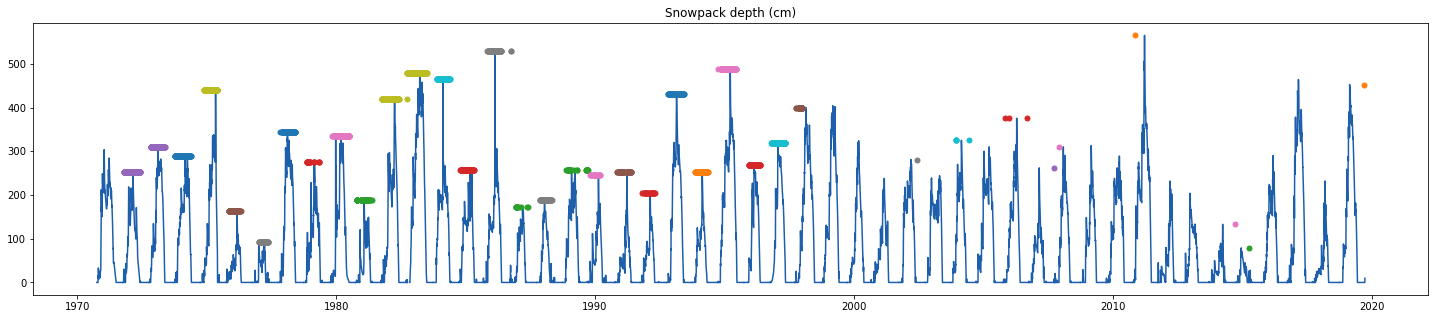

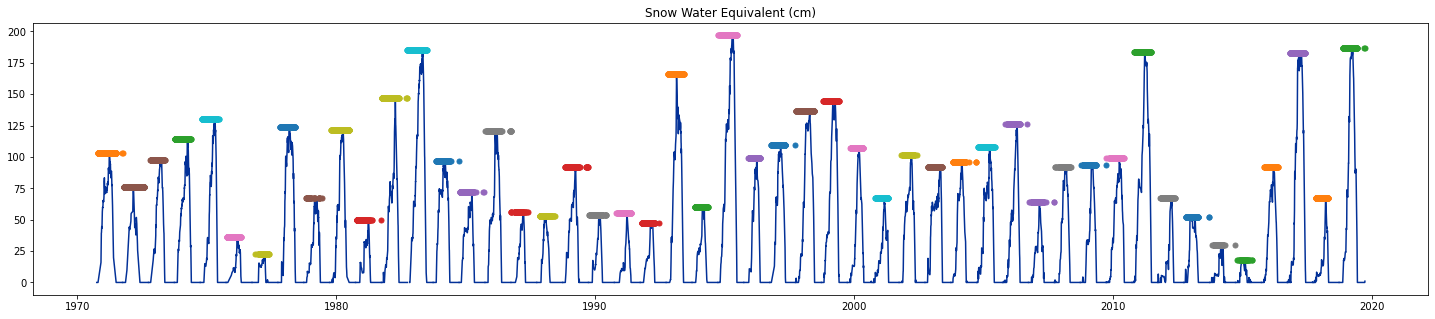

In [614]:
nannearvals = []
nanmos = []
nanyrs = []
cols = cm.roma(np.linspace(0,1,11))
for i in range(2,len(datakeys)-2):
    fig,ax = plt.subplots(figsize=(25,5))
    color = cols[i]
    for k in cssl.keys():
        data = cssl[k]
        try:
            y = pd.Series(data[datakeys[i]].astype('float'))
            y.index = index=data['dt']
            y2 = y.interpolate()
            ax.plot(y2,color=color)
            ax.set_title(datakeys[i])
        except:
            print(datakeys[i],k)
            continue
        try:
            nans = np.where(np.isnan(y))[0]
            if datakeys[i]== 'Snowpack depth (cm)':
                tmp1 = y.values[[i-1 for i in nans]]
                tmp2 = y.values[[i+1 for i in nans]]
                nannearvals.append(tmp1)
                nannearvals.append(tmp2)
            ax.plot(y.index[nans], [np.nanmax(y) for i in range(len(nans))],'o',markersize=5)
            motmp = y.index[nans].month
            nanmos.append(motmp)
            yeartmp = y.index[nans].year
            wytmp = []
            for val in motmp:
                if val <10:
                    wytmp.append(int(k)-1)
                else:
                    wytmp.append(int(k))
            nanyrs.append(wytmp)
        except:
            continue
plt.show()

        ## ask elias about the teleconnections data set

In [615]:
nanmonth = []
for arr in nanmos:
    if len(arr)>0:
        for val in arr: nanmonth.append(val)
nanyear = []
for arr in nanyrs:
    if len(arr)>0:
        for val in arr: nanyear.append(val)
nanvalue = []
for arr in nannearvals:
    if len(arr)>0:
        for val in arr: nanvalue.append(val)

In [463]:
xs = np.arange(1,12)
hts = []
for i in range(1,12):
    tmp1 = pd.Series(nanmonth)
    tmp = tmp1[tmp1==i]
    hts.append(len(tmp))


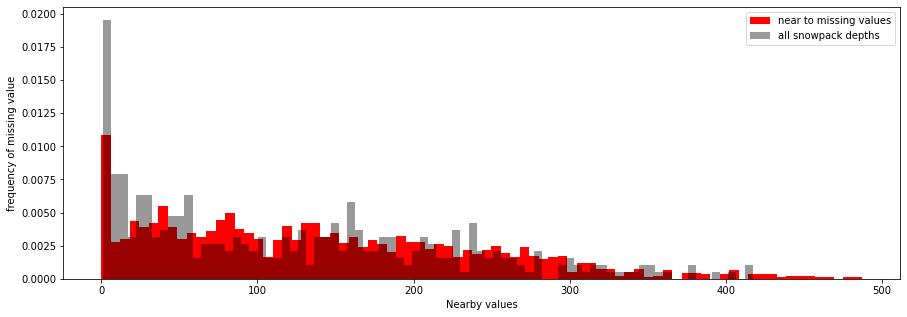

In [660]:
fig,ax = plt.subplots(figsize=(15,5))
nbins=80
ax.hist(np.array(nanvalue)[np.array(nanvalue)>-1],bins=nbins,density=True,color='red',label = 'near to missing values')
tmp = alldata['Snowpack depth (cm)']
ax.hist(tmp[tmp>1],bins=nbins,density=True,color='black',alpha=0.4,label='all snowpack depths')
ax.set_ylabel('frequency of missing value')
ax.set_xlabel('Nearby values')
ax.legend()

Text(0.5, 0, 'Month (numeric)')

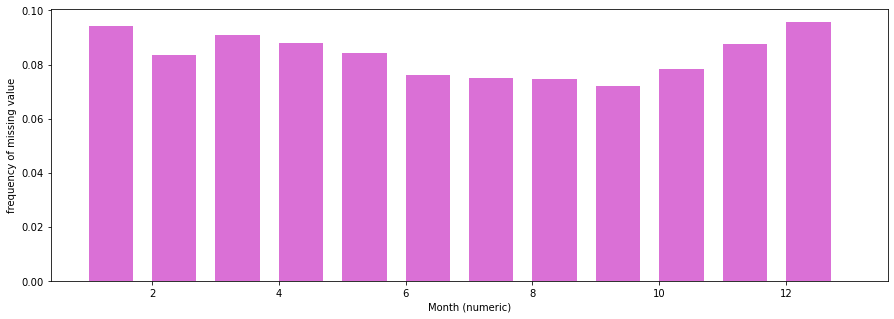

In [472]:
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(nanmonth,bins=12,width=0.7,range=[1,13],density=True,color='orchid')
ax.set_ylabel('frequency of missing value')
ax.set_xlabel('Month (numeric)')


Text(0.5, 0, 'Year')

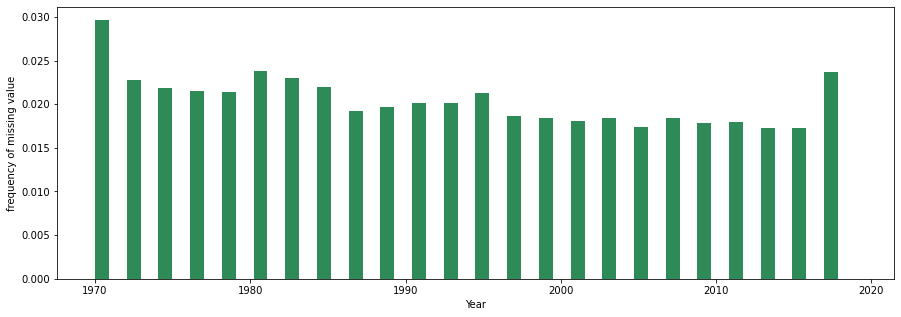

In [564]:
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(nanyear,bins=24, width=0.9,density=True,color='seagreen')
ax.set_ylabel('frequency of missing value')
ax.set_xlabel('Year')

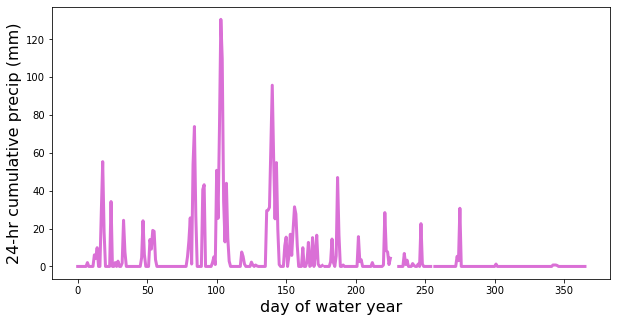

In [523]:
fig,ax=plt.subplots(figsize=(10,5))
#ax.plot(data['Air Temp Max (C)'].astype(float),color='darkred',label = 'Daily Max Temperature')
# ax.plot(data['Air Temp Min (C)'].astype(float),color = 'darkblue',label = 'Daily Min Temperature')
ax.plot(data['24-hour Total Precip (mm)'].astype(float),color='orchid',linewidth=3)
ax.set_ylabel('24-hr cumulative precip (mm)')
ax.set_xlabel('day of water year')
ax.title.set_size(20)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.show()

Text(0.5, 0, 'depth')

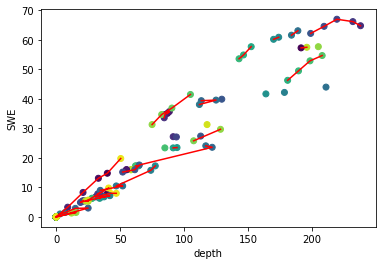

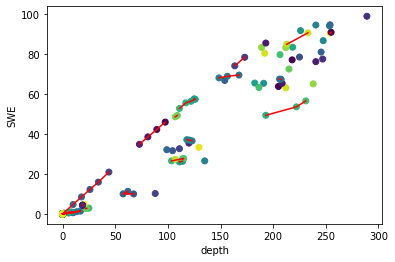

In [11]:
fig,ax=plt.subplots()
for k in ['2001']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')

fig,ax=plt.subplots()
for k in ['2010']: # cssl.keys():
    data = cssl[k]
    x = pd.Series(data['Snowpack depth (cm)'].astype('float'))
    y = pd.Series(data['Snow Water Equivalent (cm)'].astype('float'))
    tmp = pd.Series(data['dt'])
    z =  [t.day for t in tmp]
    y.index = index=data['dt']
    ax.scatter(x,y,c= z, label=k)
    ax.plot(x,y,color='r')

# ax.legend()
ax.set_ylabel('SWE')
ax.set_xlabel('depth')


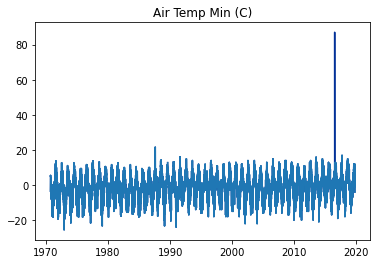

In [134]:
## what is the appropriate way to handle this as a state space model?
from scipy import signal
fig,ax=plt.subplots()
alltemp = []
alldates = []
i = 2
for k in cssl.keys():
        data = cssl[k]
        try:
            y = pd.Series(data[datakeys[i]].astype('float'))
            y.index = data['dt']
            y2 = y.interpolate()
            ax.plot(y,color=color)
            ax.set_title(datakeys[i])
            alltemp.append(list(y.values))
            alldates.append(list(y.index))
        except:
            print(datakeys[i],k)
            continue


temperature = [item for sublist in alltemp for item in sublist]
dates  =[item for sublist in alldates for item in sublist]
temp = pd.DataFrame(data = temperature,index = dates)
temperature = temp.sort_index()
temperature.columns = ['data']
## remove outliers
temperature.loc[temperature.data>30]=np.nan
plt.plot(temperature) ## should be identical minus the one large one


In [10]:
"""
Univariate Local Linear Trend Model

Author: Chad Fulton
License: Simplified-BSD
"""
from __future__ import division, absolute_import, print_function

import numpy as np
import statsmodels.api as sm

class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog, **kwargs):
        # Model order
        k_states = k_posdef = 2

        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef, **kwargs
        )

        # Initialize the matrices
        self['design'] = np.r_[1, 0]
        self['transition'] = np.array([[1, 1],
                                       [0, 1]])
        self['selection'] = np.eye(k_states)

        # Initialize the state space model as approximately diffuse
        self.initialize_approximate_diffuse()
        # Because of the diffuse initialization, burn first two
        # loglikelihoods
        self.loglikelihood_burn = 2
        
        # Cache some indices
        idx = np.diag_indices(k_posdef)
        self._state_cov_idx = ('state_cov', idx[0], idx[1])
        
        # Setup parameter names
        self._param_names = ['sigma2.measurement', 'sigma2.level', 'sigma2.trend']

    @property
    def start_params(self):
        # Simple start parameters: just set as 0.1
        return np.r_[0.1, 0.1, 0.1]

    def transform_params(self, unconstrained):
        # Parameters must all be positive for likelihood evaluation.
        # This transforms parameters from unconstrained parameters
        # returned by the optimizer to ones that can be used in the model.
        return unconstrained**2

    def untransform_params(self, constrained):
        # This transforms parameters from constrained parameters used
        # in the model to those used by the optimizer
        return constrained**0.5

    def update(self, params, **kwargs):
        # The base Model class performs some nice things like
        # transforming the params and saving them
        params = super(LocalLinearTrend, self).update(params, **kwargs)

        # Extract the parameters
        measurement_variance = params[0]
        level_variance = params[1]
        trend_variance = params[2]

        # Observation covariance
        self['obs_cov', 0, 0] = measurement_variance

        # State covariance
        self[self._state_cov_idx] = [level_variance, trend_variance]


In [135]:
import pandas as pd
from datetime import datetime
# Load Dataset
df = pd.DataFrame(data['Snowpack depth (cm)'].astype('float'))
df = pd.DataFrame(data[datakeys[1]].astype('float'))

df = temperature

df.columns = ['depth']
# df.index = pd.date_range(start=datetime(df.date[0], 1, 1), end=datetime(df.iloc[-1, 0], 1, 1), freq='AS')

# Log transform
df['ld'] = np.log(df['depth'])

# Setup the model
mod = LocalLinearTrend(df['depth'])

# Fit it using MLE (recall that we are fitting the three variance parameters)
res = mod.fit()
print(res.summary())


/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37197D+00    |proj g|=  2.66511D+01

At iterate    5    f=  2.49694D+00    |proj g|=  8.72742D-02
  ys=-5.105E-04  -gs= 6.370E-02 BFGS update SKIPPED

At iterate   10    f=  2.40260D+00    |proj g|=  2.93489D-01

At iterate   15    f=  2.37816D+00    |proj g|=  1.60483D-01

At iterate   20    f=  2.37811D+00    |proj g|=  2.85259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     37      1     1     0   2.853D-04 

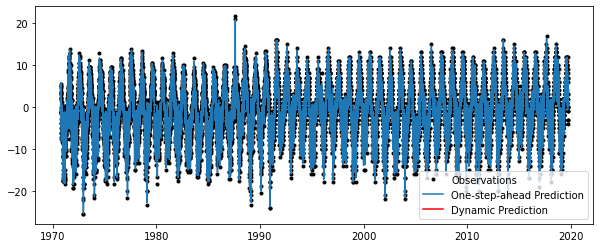

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))

# Perform dynamic prediction and forecasting
ndynamic = 5
predict_res = res.get_prediction(alpha=0.05, dynamic=df['depth'].shape[0]-ndynamic)

predict = predict_res.predicted_mean
ci = predict_res.conf_int(alpha=0.05)

# Plot the results
ax.plot(df['depth'], 'k.', label='Observations')
ax.plot(df.index[:-ndynamic], predict[:-ndynamic], label='One-step-ahead Prediction')
# ax.plot(df.index[:-ndynamic], ci.iloc[:-ndynamic], 'k--', alpha=0.5)

ax.plot(df.index[-ndynamic:], predict[-ndynamic:], 'r', label='Dynamic Prediction')
# ax.plot(df.index[-ndynamic:], ci.iloc[-ndynamic:], 'k--', alpha=0.5)

# Cleanup the image
# ax.set_ylim((5, 8))
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')


In [163]:
## what is the appropriate way to handle this as a state space model?
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

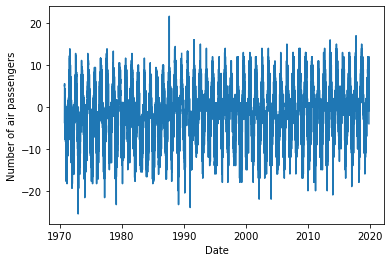

In [148]:
df = temperature.depth
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)


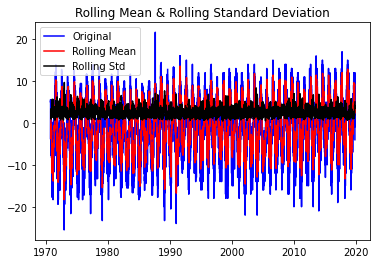

In [149]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [154]:
result = adfuller(df.interpolate())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -9.52119663415541
p-value: 3.0615848025924075e-16
Critical Values:
	1%: -3.43071633845759
	5%: -2.8617019076505152
	10%: -2.5668561792046436


In [156]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

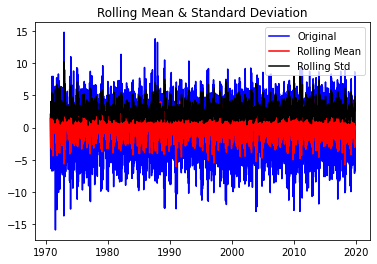

ADF Statistic: -17.709804379993855
p-value: 3.506438395668435e-30
Critical Values:
	1%: -3.4307234516500293
	5%: -2.8617050512130313
	10%: -2.5668578524750263


In [157]:
rolling_mean = df.rolling(window=12).mean()
df_log_minus_mean = df- rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


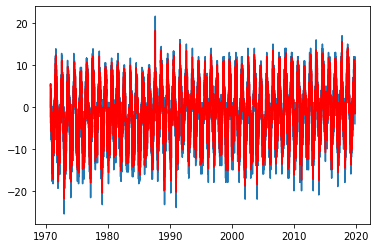

In [165]:
df = df.interpolate()
decomposition = seasonal_decompose(df) 
model = ARIMA(df, order=(2,1,2))
results = model.fit()
plt.plot(df)
plt.plot(results.fittedvalues, color='red')

In [127]:
import scipy.io
import datetime
tele = scipy.io.loadmat('/home/marianne/Documents/cssltimeseries/data/Teleconnections.mat')
data = tele['Teleconnections']
keys = ['Eur','IOD','NAO','Nino34']
teleconnections = pd.DataFrame(columns = keys)
for i in range(4):
    teleconnections[keys[i]] = data[:,i]

start = datetime.date(year = 1950,month=1,day=1)
# date_generated = [start + datetime.timedelta(month=x) for x in range(0, 852)]
min_month = "1950-01"
max_month = "2020-12"

months = pd.period_range(min_month, max_month, freq='M')
months
teleconnections.index =months
teleconnections.to_csv(datadir + 'teleconnections.csv')



In [240]:
## monthly anomalies for the data
alldata_monthly = alldata_even.resample('M').mean()
alldata_monthly.to_csv(datadir + 'csslmonthly.csv')
allkeys = list(alldata_monthly.keys())
newkeys = []
for k in allkeys:
    for i in range(1,13):
        newkey = k + '_a_' + str(i)
        newkeys.append(newkey)
#anomalykeys = [k+'_a' for k in allkeys]
#aak = allkeys + anomalykeys
#for k in anomalykeys:
#    alldata_monthly[k] = ''

month_anom = alldata_monthly.reindex(columns = alldata_monthly.columns.tolist() + newkeys)
#allkeys = alldata_monthly.keys()
#anomalykeys = [k+'_a' for k in allkeys]
for m in range(1,13):
    monthdata = alldata_monthly.loc[alldata_monthly.index.month==m]
    idxs = monthdata.index
    for k in allkeys[0:10]:
        tmp = monthdata[k]
        month_avg = np.nanmean(tmp)
        anomdata = [v-month_avg for v in tmp]
        adata_df = pd.DataFrame(data = anomdata, index = idxs)
        month_anom[k+'_a_'+str(m)] = adata_df



/tmp/ipykernel_135282/1006388158.py:23: RuntimeWarning: Mean of empty slice
  month_avg = np.nanmean(tmp)


<AxesSubplot:xlabel='Date'>

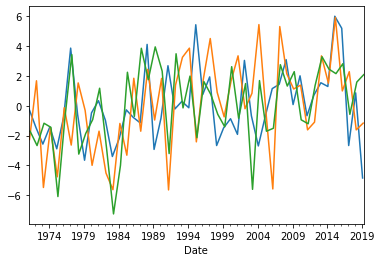

In [251]:
fig,ax=plt.subplots()
#month_anom['Air Temp Max (C)_a_12'].loc[month_anom.index.month==12].plot(ax=ax)
#month_anom['Air Temp Max (C)_a_11'].loc[month_anom.index.month==11].plot(ax=ax)
#month_anom['Air Temp Max (C)_a_1'].loc[month_anom.index.month==1].plot(ax=ax)
month_anom['Air Temp Max (C)_a_2'].loc[month_anom.index.month==2].plot(ax=ax)
month_anom['Air Temp Max (C)_a_3'].loc[month_anom.index.month==3].plot(ax=ax)
month_anom['Air Temp Max (C)_a_4'].loc[month_anom.index.month==4].plot(ax=ax)

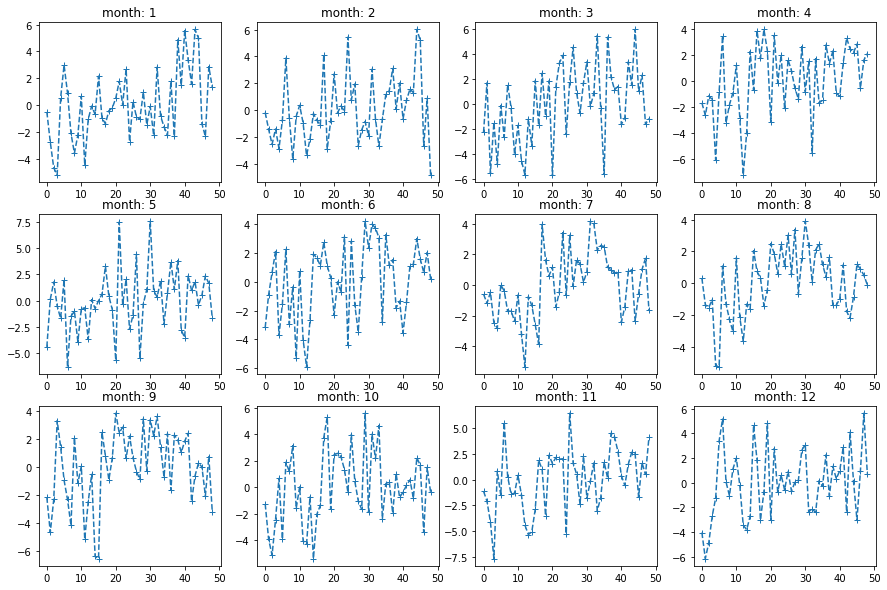

In [33]:
month_anom = pd.read_csv(datadir + 'monthlytemperatureanoms.csv')
fig,ax=plt.subplots(3,4,figsize=(15,10))
axs = ax.flatten()
anoms = pd.DataFrame()
for i in range(1,13):
    label = 'anom'+str(i)
    ts_tmp = month_anom['anom'+str(i)].values # .loc[month_anom.index.month==i]
    axs[i-1].plot(ts_tmp,'+--')
    axs[i-1].set_title('month: '+str(i))
    '''wy = []
    for val in ts_tmp.index:
        if val.month <10:
            wy.append(val.year-1)
        else:
            wy.append(val.year)
    ts_tmp.index = wy
    anoms[label] = ts_tmp'''



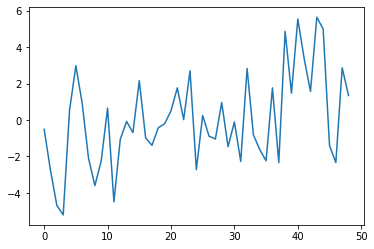

In [20]:
plt.plot(ts_tmp.values)

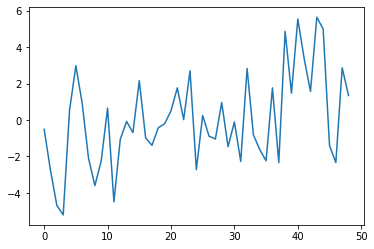

In [23]:
plt.plot(month_anom['anom'+str(i)].values)

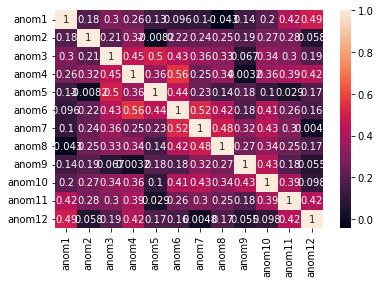

In [268]:
import seaborn as sn
corrMatrix = anoms.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


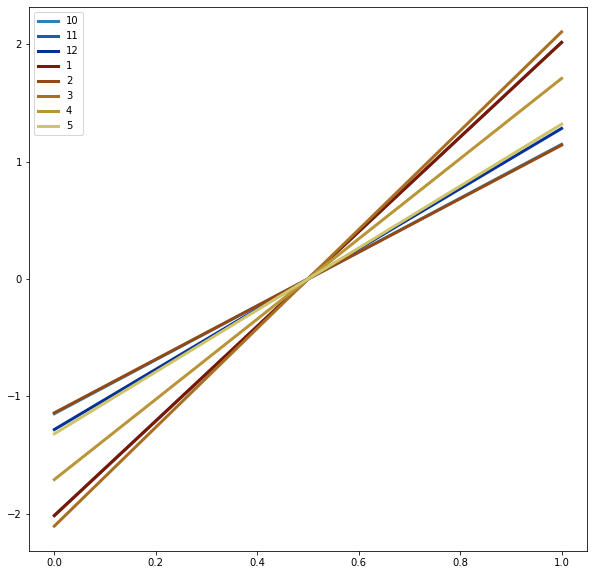

In [312]:
from sklearn.linear_model import LinearRegression
colors = cm.roma(np.linspace(0,1,12))
fig,ax=plt.subplots(figsize=(10,10))
for i in [10,11,12,1,2,3,4,5]:
    y = anoms[anoms.keys()[i-1]].values.reshape(-1,1)
    x = np.linspace(0,1,len(x)).reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(x,y)
    # plot it as in the example at http://scikit-learn.org/
    #ax.scatter(X, y,  color='black')
    ax.plot(x, regressor.predict(x), linewidth=3, label = str(i),color=colors[i-1])
()
ax.legend()
plt.show()


In [596]:
alldata = pd.read_csv(datadir + 'csslmonthly.csv')
wy = []
mo = []
for i in range(len(alldata)):
    date = alldata.loc[i].Date.split('-')
    year = date[0]
    month = date[1]
    if int(month)<10:
        wy.append(int(year)-1)
    else:
        wy.append(int(year))
    mo.append(month)

alldata['wy'] = wy
alldata['mo'] = mo


maxdepth = []
maxswe = []
totalsnow = []
totalprecip=[]
meananomaly=[]
maxtemp1 = []
maxtemp2 = []
maxtemp3 = []
maxtemp4 = []
maxtemp5 = []
maxtemp6 = []
maxtemp7 = []
maxtemp8 = []
maxtemp9 = []
maxtemp10 = []
maxtemp11 = []
maxtemp12 = []
mintemp1 = []
mintemp2 = []
mintemp3 = []
mintemp4 = []
mintemp5 = []
mintemp6 = []
mintemp7 = []
mintemp8 = []
mintemp9 = []
mintemp10 = []
mintemp11 = []
mintemp12 = []

for yr in range(1970,2019):
    tmpdata = alldata[alldata.wy==yr]
    anomaly = anoms.loc[yr]
    maxdepth.append(np.nanmax(tmpdata['Snowpack depth (cm)']))
    maxswe.append(np.nanmax(tmpdata['Snow Water Equivalent (cm)']))
    totalsnow.append(np.nanmax(tmpdata['Season Total Snow (cm)']))
    totalprecip.append(np.nanmax(tmpdata['Season Total Precip (mm)']))
    maxtemp1.append(float(tmpdata.loc[tmpdata.mo=='01']['Air Temp Max (C)']))
    maxtemp2.append(float(tmpdata.loc[tmpdata.mo=='02']['Air Temp Max (C)']))
    maxtemp3.append(float(tmpdata.loc[tmpdata.mo=='03']['Air Temp Max (C)']))
    maxtemp4.append(float(tmpdata.loc[tmpdata.mo=='04']['Air Temp Max (C)']))
    maxtemp5.append(float(tmpdata.loc[tmpdata.mo=='05']['Air Temp Max (C)']))
    maxtemp6.append(float(tmpdata.loc[tmpdata.mo=='06']['Air Temp Max (C)']))
    maxtemp7.append(float(tmpdata.loc[tmpdata.mo=='07']['Air Temp Max (C)']))
    maxtemp8.append(float(tmpdata.loc[tmpdata.mo=='08']['Air Temp Max (C)']))
    maxtemp9.append(float(tmpdata.loc[tmpdata.mo=='09']['Air Temp Max (C)']))
    maxtemp10.append(float(tmpdata.loc[tmpdata.mo=='10']['Air Temp Max (C)']))
    maxtemp11.append(float(tmpdata.loc[tmpdata.mo=='11']['Air Temp Max (C)']))
    maxtemp12.append(float(tmpdata.loc[tmpdata.mo=='12']['Air Temp Max (C)']))
    mintemp1.append(float(tmpdata.loc[tmpdata.mo=='01']['Air Temp Min (C)']))
    mintemp2.append(float(tmpdata.loc[tmpdata.mo=='02']['Air Temp Min (C)']))
    mintemp3.append(float(tmpdata.loc[tmpdata.mo=='03']['Air Temp Min (C)']))
    mintemp4.append(float(tmpdata.loc[tmpdata.mo=='04']['Air Temp Min (C)']))
    mintemp5.append(float(tmpdata.loc[tmpdata.mo=='05']['Air Temp Min (C)']))
    mintemp6.append(float(tmpdata.loc[tmpdata.mo=='06']['Air Temp Min (C)']))
    mintemp7.append(float(tmpdata.loc[tmpdata.mo=='07']['Air Temp Min (C)']))
    mintemp8.append(float(tmpdata.loc[tmpdata.mo=='08']['Air Temp Min (C)']))
    mintemp9.append(float(tmpdata.loc[tmpdata.mo=='09']['Air Temp Min (C)']))
    mintemp10.append(float(tmpdata.loc[tmpdata.mo=='10']['Air Temp Min (C)']))
    mintemp11.append(float(tmpdata.loc[tmpdata.mo=='11']['Air Temp Min (C)']))
    mintemp12.append(float(tmpdata.loc[tmpdata.mo=='12']['Air Temp Min (C)']))
    meananomaly.append(np.nanmean(anomaly))



maxwy = pd.DataFrame(data = {'maxdepth': maxdepth,
                            'maxswe': maxswe,
                            'totalsnow':totalsnow,
                            'totalprecip':totalprecip,
                            'meananomaly':meananomaly,
                            'maxtemp1':maxtemp1,
                            'maxtemp2':maxtemp2,
                            'maxtemp3':maxtemp3,
                            'maxtemp4':maxtemp4,
                            'maxtemp5':maxtemp5,
                            'maxtemp6':maxtemp6,
                            'maxtemp7':maxtemp7,
                            'maxtemp8':maxtemp8,
                            'maxtemp9':maxtemp9,
                            'maxtemp10':maxtemp10,
                            'maxtemp11':maxtemp11,
                            'maxtemp12':maxtemp12,
                            'mintemp1':mintemp1,
                            'mintemp2':mintemp2,
                            'mintemp3':mintemp3,
                            'mintemp4':mintemp4,
                            'mintemp5':mintemp5,
                            'mintemp6':mintemp6,
                            'mintemp7':mintemp7,
                            'mintemp8':mintemp8,
                            'mintemp9':mintemp9,
                            'mintemp10':mintemp10,
                            'mintemp11':mintemp11,
                            'mintemp12':mintemp12,
                            }, 
                            index =np.arange(1970,2019))


maxwy.to_csv(datadir + 'max_by_wy.csv')


In [670]:
allanoms=[]
for yr in range(1970,2019):
    tmp = anoms[anoms.index==yr]
    for k in tmp.keys():
        allanoms.append(tmp[k].values[0])

pd.Series(data=allanoms).to_csv(datadir + 'allanoms.csv')

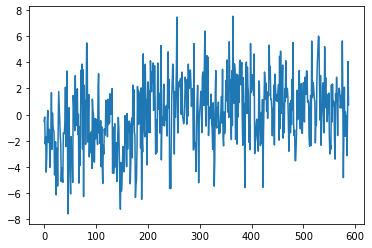

In [671]:
plt.plot(allanoms)

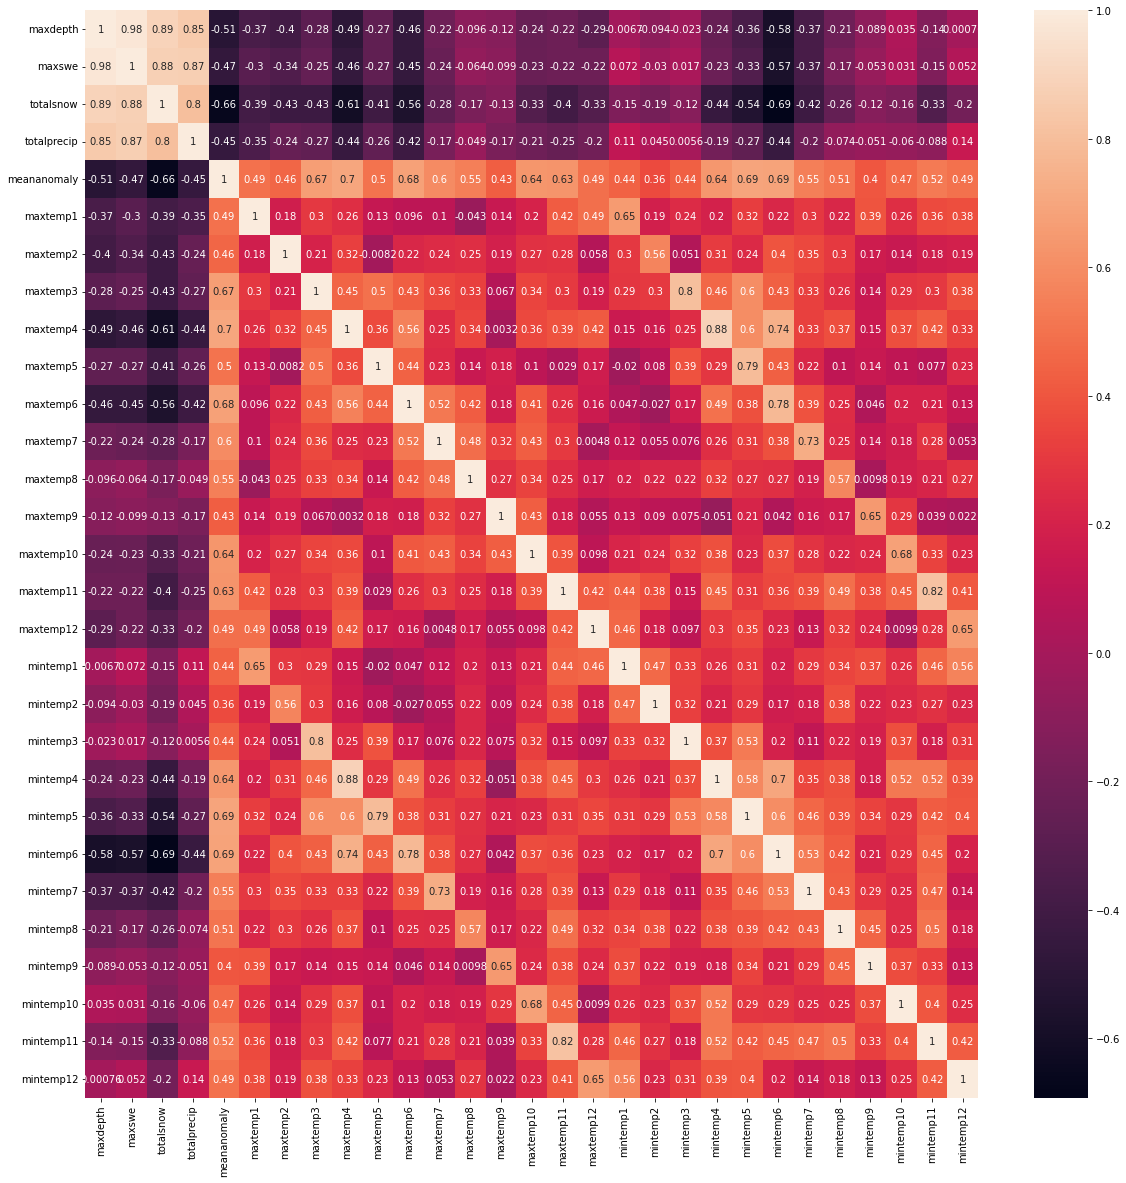

In [602]:
import seaborn as sn
fig,ax=plt.subplots(figsize=(20,20))
corrMatrix = maxwy.corr()
sn.heatmap(corrMatrix, ax=ax,annot=True)
plt.show()


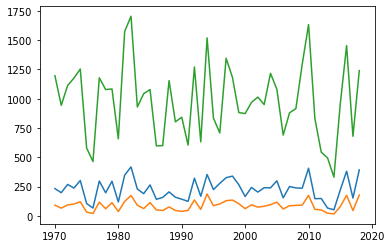

In [351]:
fig,ax=plt.subplots()
ax.plot(maxwy.wy,maxwy.maxdepth)
ax.plot(maxwy.wy,maxwy.maxswe)
ax.plot(maxwy.wy,maxwy.totalsnow)

NameError: name 'maxwy' is not defined

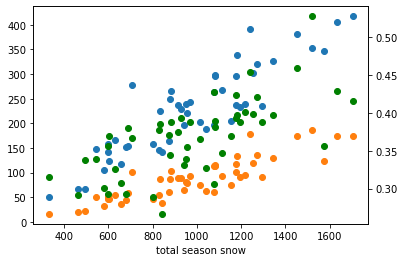

In [360]:
fig,ax=plt.subplots()
ax.plot(maxwy.totalsnow,maxwy.maxdepth,'o',label='depth')
ax.plot(maxwy.totalsnow,maxwy.maxswe,'o',label = 'swe')
ax2 = ax.twinx()
ax2.plot(maxwy.totalsnow,maxwy.maxswe/maxwy.maxdepth,'o',label='density',color='green')
ax.set_xlabel('total season snow')
plt.show()


In [38]:
nino = pd.read_csv('/home/marianne/Documents/data/elnino.csv')
nino

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
0,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
2,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
3,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
4,1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,-0.9,-0.9,-0.7,-0.5,-0.2,0.0,0.1,0.2,0.5,0.8,0.9,0.8
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0


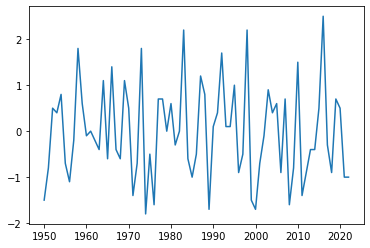

In [36]:
plt.plot(nino.Year,nino.DJF)

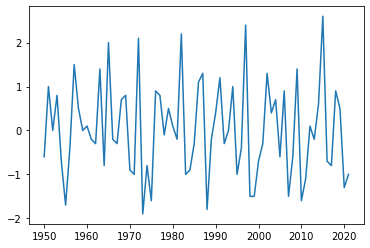

In [37]:
plt.plot(nino.Year,nino.OND)